In [1]:
import altair as alt
import json
import pandas as pd
import numpy as np
import warnings

from pybench.chart import grouped_bar_chart
import pybench.themes
from pybench.utils import (
    benchmark_json_to_pandas,
    compute_speedup,
    filter_by_string_in_column,
    significant_round,
    split_params_list,
)

In [2]:
# Read a pytest-benchmark json into a pandas DataFrame.
df = benchmark_json_to_pandas('benchmark_array.json')

In [3]:
df

,fullname,group,name,options.disable_gc,options.max_time,options.min_rounds,options.min_time,options.timer,options.warmup,param,...,stats.median,stats.min,stats.ops,stats.outliers,stats.q1,stats.q3,stats.rounds,stats.stddev,stats.stddev_outliers,stats.total
0,pybench/benchmarks/benchmark_array.py::test_FF...,None,test_FFT[shape0-numpy],False,1.0,5,0.000005,perf_counter,False,shape0-numpy,...,0.016670,0.015926,55.982082,1;1,0.016357,0.018566,5,0.003005,1,0.089314
1,pybench/benchmarks/benchmark_array.py::test_FF...,None,test_FFT[shape0-cupy],False,1.0,5,0.000005,perf_counter,False,shape0-cupy,...,0.003146,0.002800,315.651453,1;0,0.002880,0.003348,5,0.000382,1,0.015840
2,pybench/benchmarks/benchmark_array.py::test_FF...,None,test_FFT[shape1-numpy],False,1.0,5,0.000005,perf_counter,False,shape1-numpy,...,2.509214,2.478150,0.396244,1;0,2.487194,2.558154,5,0.047411,1,12.618496
3,pybench/benchmarks/benchmark_array.py::test_FF...,None,test_FFT[shape1-cupy],False,1.0,5,0.000005,perf_counter,False,shape1-cupy,...,0.012105,0.011504,70.746491,1;1,0.011846,0.015378,5,0.004387,1,0.070675
4,pybench/benchmarks/benchmark_array.py::test_FF...,None,test_FFT[shape2-numpy],False,1.0,5,0.000005,perf_counter,False,shape2-numpy,...,11.454694,11.144023,0.087780,2;0,11.236303,11.509395,5,0.187650,2,56.960521
5,pybench/benchmarks/benchmark_array.py::test_FF...,None,test_FFT[shape2-cupy],False,1.0,5,0.000005,perf_counter,False,shape2-cupy,...,0.043478,0.041427,9.159153,1;1,0.041553,0.131715,5,0.143473,1,0.545902
6,pybench/benchmarks/benchmark_array.py::test_Su...,None,test_Sum[shape0-numpy],False,1.0,5,0.000005,perf_counter,False,shape0-numpy,...,0.000334,0.000333,2993.666132,1;0,0.000333,0.000335,5,0.000002,1,0.001670
7,pybench/benchmarks/benchmark_array.py::test_Su...,None,test_Sum[shape0-cupy],False,1.0,5,0.000005,perf_counter,False,shape0-cupy,...,0.000761,0.000750,1306.828230,1;0,0.000756,0.000771,5,0.000016,1,0.003826
8,pybench/benchmarks/benchmark_array.py::test_Su...,None,test_Sum[shape1-numpy],False,1.0,5,0.000005,perf_counter,False,shape1-numpy,...,0.063472,0.063394,15.728330,1;0,0.063408,0.063785,5,0.000215,1,0.317898
9,pybench/benchmarks/benchmark_array.py::test_Su...,None,test_Sum[shape1-cupy],False,1.0,5,0.000005,perf_counter,False,shape1-cupy,...,0.082399,0.082244,12.140813,1;0,0.082323,0.082420,5,0.000075,1,0.411834


In [4]:
# Split list 'params.shape' into multiple columns.
# In this example the list is split in 'params.shape.0' and 'params.shape.1'.
df = split_params_list(df, 'params.shape')

In [5]:
# Split only "fast" operations into `cupy_df`.
cupy_df = filter_by_string_in_column(df, 'name', 'cupy')

In [6]:
# Split only "slow" operations into `numpy_df`.
numpy_df = filter_by_string_in_column(df, 'name', 'numpy')

In [7]:
# Define the list of operations we want to plot.
operation_list = [
    'FFT',
    'Sum',
    'Standard_Deviation',
    'Elementwise',
    'Matrix_Multiplication',
    'Array_Slicing',
    'SVD',
    'Stencil'
]

In [8]:
# Define the list of parameters we will use to match entries in "fast" and
# "slow" DataFrames.
param_list = ['params.shape.0', 'params.shape.1']

In [9]:
# Define the metric we want to use to compute the speedup.
stats_param = 'stats.median'

In [10]:
# Compute the speedup DataFrame.
speedups_df = compute_speedup(numpy_df, cupy_df, operation_list, param_list, stats_param)

In [11]:
speedups_df

,name,params.shape.0,params.shape.1,stats.median_x,stats.median_y,speedup
0,FFT,1000,1000,0.016670,0.003146,5.3
1,FFT,10000,10000,2.509214,0.012105,210.0
2,FFT,20000,20000,11.454694,0.043478,260.0
3,Sum,1000,1000,0.000334,0.000761,-2.3
4,Sum,10000,10000,0.063472,0.082399,-1.3
5,Sum,20000,20000,0.257886,0.331517,-1.3
6,Standard_Deviation,1000,1000,0.001726,0.001515,1.1
7,Standard_Deviation,10000,10000,0.584854,0.167408,3.5
8,Standard_Deviation,20000,20000,2.348155,0.674575,3.5
9,Elementwise,1000,1000,0.027001,0.000179,150.0


In [12]:
# Remove dots from column names, altair doesn't seem to work with them.
speedups_df = speedups_df.rename(columns={'params.shape.0': 'shape0'})
speedups_df = speedups_df.rename(columns={'params.shape.1': 'shape1'})

# Drop rows based on certain conditions, such as their shapes
speedups_df.drop(speedups_df[speedups_df['shape0'] == 20000].index, inplace=True)

# Give human readable names to shapes and store them in column 'size'
speedups_df['size'] = speedups_df['shape0'].apply(lambda row: '800MB' if row == 10000 else '8MB')

# Replace underscores with spaces in operation names for better printing
speedups_df['name'] = speedups_df['name'].apply(lambda n: n.replace('_', ' '))

In [13]:
speedups_df

,name,shape0,shape1,stats.median_x,stats.median_y,speedup,size
0,FFT,1000,1000,0.016670,0.003146,5.3,8MB
1,FFT,10000,10000,2.509214,0.012105,210.0,800MB
3,Sum,1000,1000,0.000334,0.000761,-2.3,8MB
4,Sum,10000,10000,0.063472,0.082399,-1.3,800MB
6,Standard Deviation,1000,1000,0.001726,0.001515,1.1,8MB
7,Standard Deviation,10000,10000,0.584854,0.167408,3.5,800MB
9,Elementwise,1000,1000,0.027001,0.000179,150.0,8MB
10,Elementwise,10000,10000,3.498601,0.013061,270.0,800MB
12,Matrix Multiplication,1000,1000,0.007469,0.000408,18.0,8MB
13,Matrix Multiplication,10000,10000,3.251713,0.285531,11.0,800MB


In [14]:
# Enable theme "RAPIDS" from pybench.themes
alt.themes.enable("RAPIDS")

# Create altair chart from `speedups_df`
chart = grouped_bar_chart(
    speedups_df,
    'size',
    'speedup',
    'name',
    ['800MB', '8MB'],
    y_title='GPU Speedup Over CPU',
    y_scale_type='symlog',
    y_tick_count=5,
    group_title='Operation',
    bar_title_angle=-20,
    legend_title='Array Size (MB)',
    group_height=500,
    group_width=80)

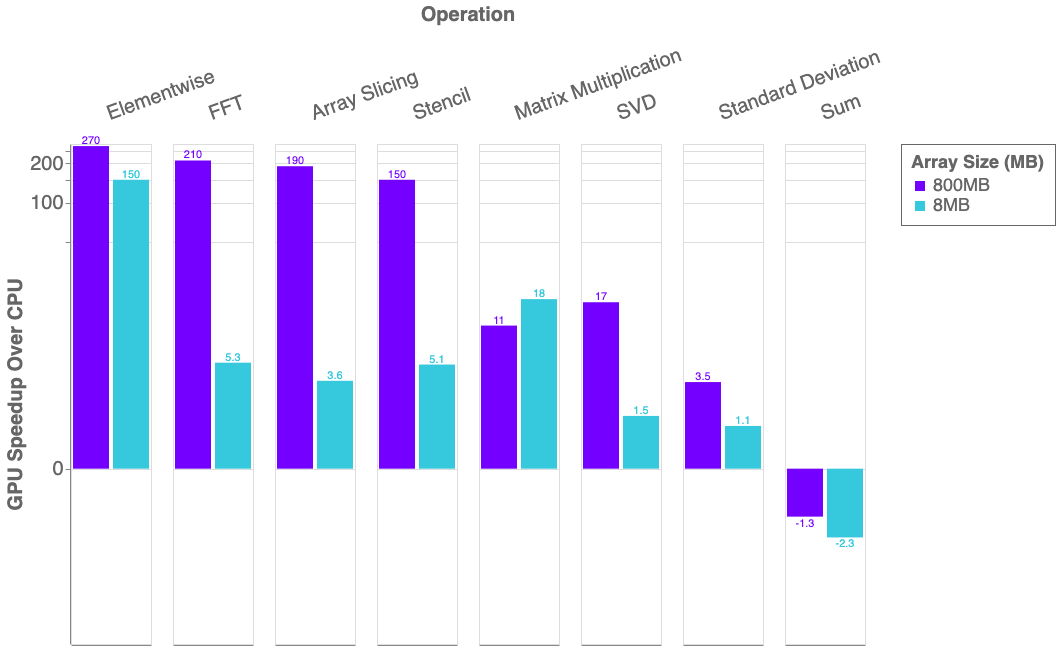

In [15]:
chart

In [16]:
# Save chart to HTML file
chart.save('plot_array_example.html')